In [1]:
pip install PyGithub

Note: you may need to restart the kernel to use updated packages.


In [2]:
from github import Github
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
ACCESS_TOKEN = '821f643807b3d0078f309d35531c7e59d577aa43'

In [4]:
g = Github(ACCESS_TOKEN)

In [5]:
print(g.get_user().get_repos())

In [6]:
def search_github(keywords):
    query = '+'.join(keywords) + '+in:readme+in:description'
    result = g.search_repositories(query, 'stars', 'desc')
 
    print(f'Found {result.totalCount} repo(s)')
 
    for repo in result:
        print(repo.clone_url)
 

In [7]:
if __name__ == '__main__':
    keywords = input('Enter keyword(s)[e.g python, flask, postgres]: ')

    keywords = [keyword.strip() for keyword in keywords.split(',')]
search_github(keywords)

Enter keyword(s)[e.g python, flask, postgres]: python, flask, postgres
Found 126 repo(s)
https://github.com/olawalejarvis/blog_api_tutorial.git
https://github.com/Leo-G/Freddy.git
https://github.com/joealcorn/PyPaste.git
https://github.com/adamlamers/dokku-flask-blog.git
https://github.com/GiordanaFurquim/Femail-Social-Network.git
https://github.com/jeremyletran/react-flask-boilerplate.git
https://github.com/minodes/flask_boilerplate.git
https://github.com/LeslieWilson/python_playground.git
https://github.com/AbnerErnaniADSFatec/sigma.git
https://github.com/GarimaChauhan16/CTA-Ridership-Visualization.git
https://github.com/lion7472/religion-backend-app.git
https://github.com/Menithal/hifi-ipfs.git
https://github.com/mjindal123/Python-Pandas-Numpy-Folium.git
https://github.com/eday69/reactAPISQL.git
https://github.com/jaredhancock31/gittyserver.git
https://github.com/koolshams/flask-example.git
https://github.com/eejdoowad/book-platform.git
https://github.com/chimailo/aecio.git
https://

In [9]:
repo = g.get_repo("gothinkster/realworld")
#gothinkster/realworld

dates = []
adds = []
dels = []
values = []
count = -1

commits = repo.get_commits()
for commit in commits:
    date = commit.commit.author.date.date()
    date = date.replace(day = 1)
    addition = commit.stats.additions
    deletion = commit.stats.deletions
    total = commit.stats.total
    
    if date in dates:
        index = dates.index(date)
        adds[index] = adds[index] + addition
        dels[index] = dels[index] + deletion
        values[index] = values[index] + total
    else:
        dates.append(date)
        adds.append(addition)
        dels.append(deletion)
        values.append(total)
        
data = {'Date': dates, 'Additions': adds, 'Deletions': dels, 'Total': values}
df = pd.DataFrame(data=data)

df.to_csv('./gothinkster-realworld.csv', index=False)
df.head(20)

,Date,Additions,Deletions,Total
0,2020-01-01,53,36,89
1,2019-12-01,19,19,38
2,2019-11-01,78,70,148
3,2019-09-01,28,5,33
4,2019-08-01,20,23,43
5,2019-07-01,15,15,30
6,2019-06-01,49,48,97
7,2019-04-01,40,38,78
8,2019-03-01,35,31,66
9,2019-02-01,201,162,363


In [89]:
repo = g.get_repo("CiaranCarroll1/TeamOrange")
compare = repo.compare("08372fb4eb1a7389a1c4197a0cb4ec2a4e48a6da", "91674763996e7a3ce356159f561e97a783c8eb23")

commits = compare.commits

for commit in commits:
    print(commit)

#filenames = []
#adds = []
#dels = []
#changes = []

#files = compare.files

#for file in files:
 #   filenames.append(file.filename)
  #  adds.append(file.additions)
   # dels.append(file.deletions)
    #changes.append(file.changes)
    
#data = {'File': filenames, 'Additions': adds, 'Deletions': dels, 'Total': changes}
#df = pd.DataFrame(data=data)

#df.tail(20)


Commit(sha="1c9a1d56cceff478e2fe4ce660aa7b0a10f2591d")
Commit(sha="0b70189ec12bf64dd278de0df0370e143ee50b9c")
Commit(sha="d2e06b9b00cc30e82d5d7831007444033c7a3248")
Commit(sha="ed522d77467f244dcf4a72123c9b32d956a6c6a5")
Commit(sha="da8689664cca5d3a28d41a09870744f86961744b")
Commit(sha="7d3b619b02b6298a6221b555a237583b75890396")
Commit(sha="c474413fa64cc960a9d5d1981549d4f5d1708ac4")
Commit(sha="ab039b2a39c11a89ee30bac9bacda90d9152a9f8")
Commit(sha="e81bb16c2fe092f114a8947b2c6babd5e038fe38")
Commit(sha="0ddf67a859cb4bec0ebeb70b4559beb3f83f0a40")
Commit(sha="20bb143c1121f665a7053f833218453daabd1041")
Commit(sha="b3e7b2c59e92d31ad09e3d2784500cdc5d315b0a")
Commit(sha="44a536f16942b252e37e58c1b0c2875449b2f897")
Commit(sha="303a5e75b7c1ab2d42d6ba9e447133e8d6fafabb")
Commit(sha="457d76ca9850990a0f9e6e0b789e1b644943ac4b")
Commit(sha="b5fc5a7ba17fc43ca5be35f548bb0b779b6821fb")
Commit(sha="4d2962ae8e11c52f26493a804e1ff78a189dd985")
Commit(sha="d700184a33ab969cae4f9ff2240167342aac5bd6")
Commit(sha

<IPython.core.display.Javascript object>


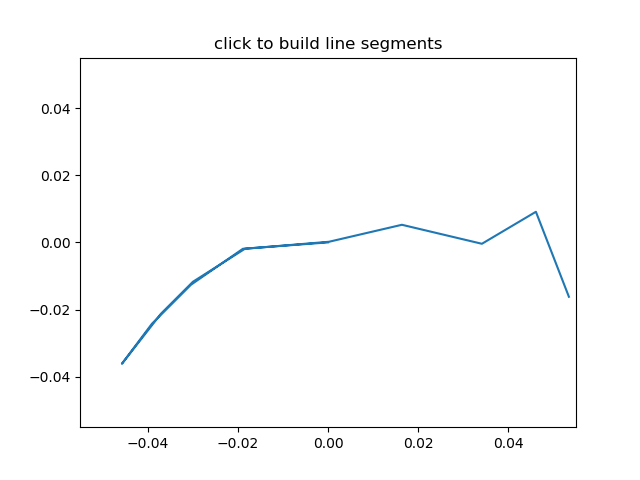

In [31]:
class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()

In [84]:
repo = g.get_repo("CiaranCarroll1/TeamOrange")
commits = repo.get_commits()
for commit in commits:
    print(commit)
    print(commit.stats.total)

Commit(sha="6b0510ce297f2fd032bd05635ba192ba15f764c2")
2
Commit(sha="4e7630dd4137fa480491a17a9b5fdc83323cc721")
121
Commit(sha="91674763996e7a3ce356159f561e97a783c8eb23")
120
Commit(sha="85743427fd1e0602f76765a4501ecd2eb6b4e45a")
76
Commit(sha="152fa499de69ddf81a01fd15f30d6e3c199f93c1")
506
Commit(sha="6233e1cc22b41cfbfef2ab1c71edd8b2f0574d55")
181
Commit(sha="e2ece52284d1ed052c5489a63b8314e5e1f4c91c")
320
Commit(sha="6ffe61813bf5a75d1b4e088492b17e738496c7e0")
214
Commit(sha="033256eb9876b1523612736187f9179c4e3185ae")
150
Commit(sha="4582ba944056eea9bff4a3ce1f22ff9f1e431e24")
85
Commit(sha="460804283d115edc0776bcd17b7f0d154ce1abb1")
132
Commit(sha="06f2fa49d3550f65c96e2e626669d6010d8e2d58")
162
Commit(sha="e426ac45e98b2dd1ec605e5dcc6f96eba05b6b8d")
198
Commit(sha="40dfe829163500d0a363236db302808dca55e3fd")
76
Commit(sha="b5bfb8c24837059fb62e267bcd46608c49290b3a")
128
Commit(sha="e3cfbeea42d5f3e635a86fe9539ae8e145b43cc2")
70
Commit(sha="06582de05ef1aa23e67be02ed5e58e2515c50197")
7
Commi

In [86]:
commit = repo.get_commit("2106b640216f81208c5afbc5f97f365cbe2a7c2b")

filenames = []
adds = []
dels = []
changes = []

files = commit.files

for file in files:
    filenames.append(file.filename)
    adds.append(file.additions)
    dels.append(file.deletions)
    changes.append(file.changes)
    
data = {'File': filenames, 'Additions': adds, 'Deletions': dels, 'Total': changes}
df = pd.DataFrame(data=data)

df.tail(20)

,File,Additions,Deletions,Total
17,src/business/logic/order/Order.java,21,10,31
18,src/business/logic/payment/PayByCard.java,11,0,11
19,src/business/logic/payment/PayByCash.java,10,0,10
20,src/business/logic/payment/PayContext.java,13,0,13
21,src/business/logic/payment/PayStrategy.java,6,0,6
22,src/business/service/OrderService.java,64,6,70
23,src/data/AccountHandler.java,0,5,5
24,src/ui/controller/CreateAccountController.java,23,23,46
25,src/ui/controller/CreateOrderController.java,15,31,46
26,src/ui/controller/LoginController.java,0,1,1


In [8]:
df.to_csv('./result.csv', index=False)